In [ ]:
#Import de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Abertura de Documento/Dados
df = pd.read_csv("/content/Dados Históricos - Ibovespa 17.12.2015_17.12.2025.csv")

## Exploração e Tratamento de Dados

In [ ]:
#Exploração de Dados
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,17.12.2025,157.327,158.578,158.611,156.351,"11,34B","-0,79%"
1,16.12.2025,158.578,162.482,162.482,158.558,"9,92B","-2,40%"
2,15.12.2025,162.482,160.766,163.073,160.766,"8,23B","1,07%"
3,12.12.2025,160.766,159.189,161.263,159.189,"7,67B","0,99%"
4,11.12.2025,159.189,159.072,159.850,158.098,"7,02B","0,07%"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      2484 non-null   object 
 1   Último    2484 non-null   float64
 2   Abertura  2484 non-null   float64
 3   Máxima    2484 non-null   float64
 4   Mínima    2484 non-null   float64
 5   Vol.      2483 non-null   object 
 6   Var%      2484 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.0+ KB


In [ ]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,2484.000000,2484.000000,2484.000000,2484.000000
mean,100.674880,100.630367,101.507322,99.801389
std,26.423779,26.422517,26.495154,26.348130
min,37.497000,37.501000,38.031000,37.046000
25%,79.281500,79.202500,80.226250,78.458250
50%,105.383000,105.340500,106.401000,104.347500
75%,120.002750,120.001250,120.835750,119.147750
max,164.456000,164.461000,165.036000,161.759000


In [ ]:
#Identificar valores duplicados
df.duplicated().sum()

np.int64(0)

<Axes: >

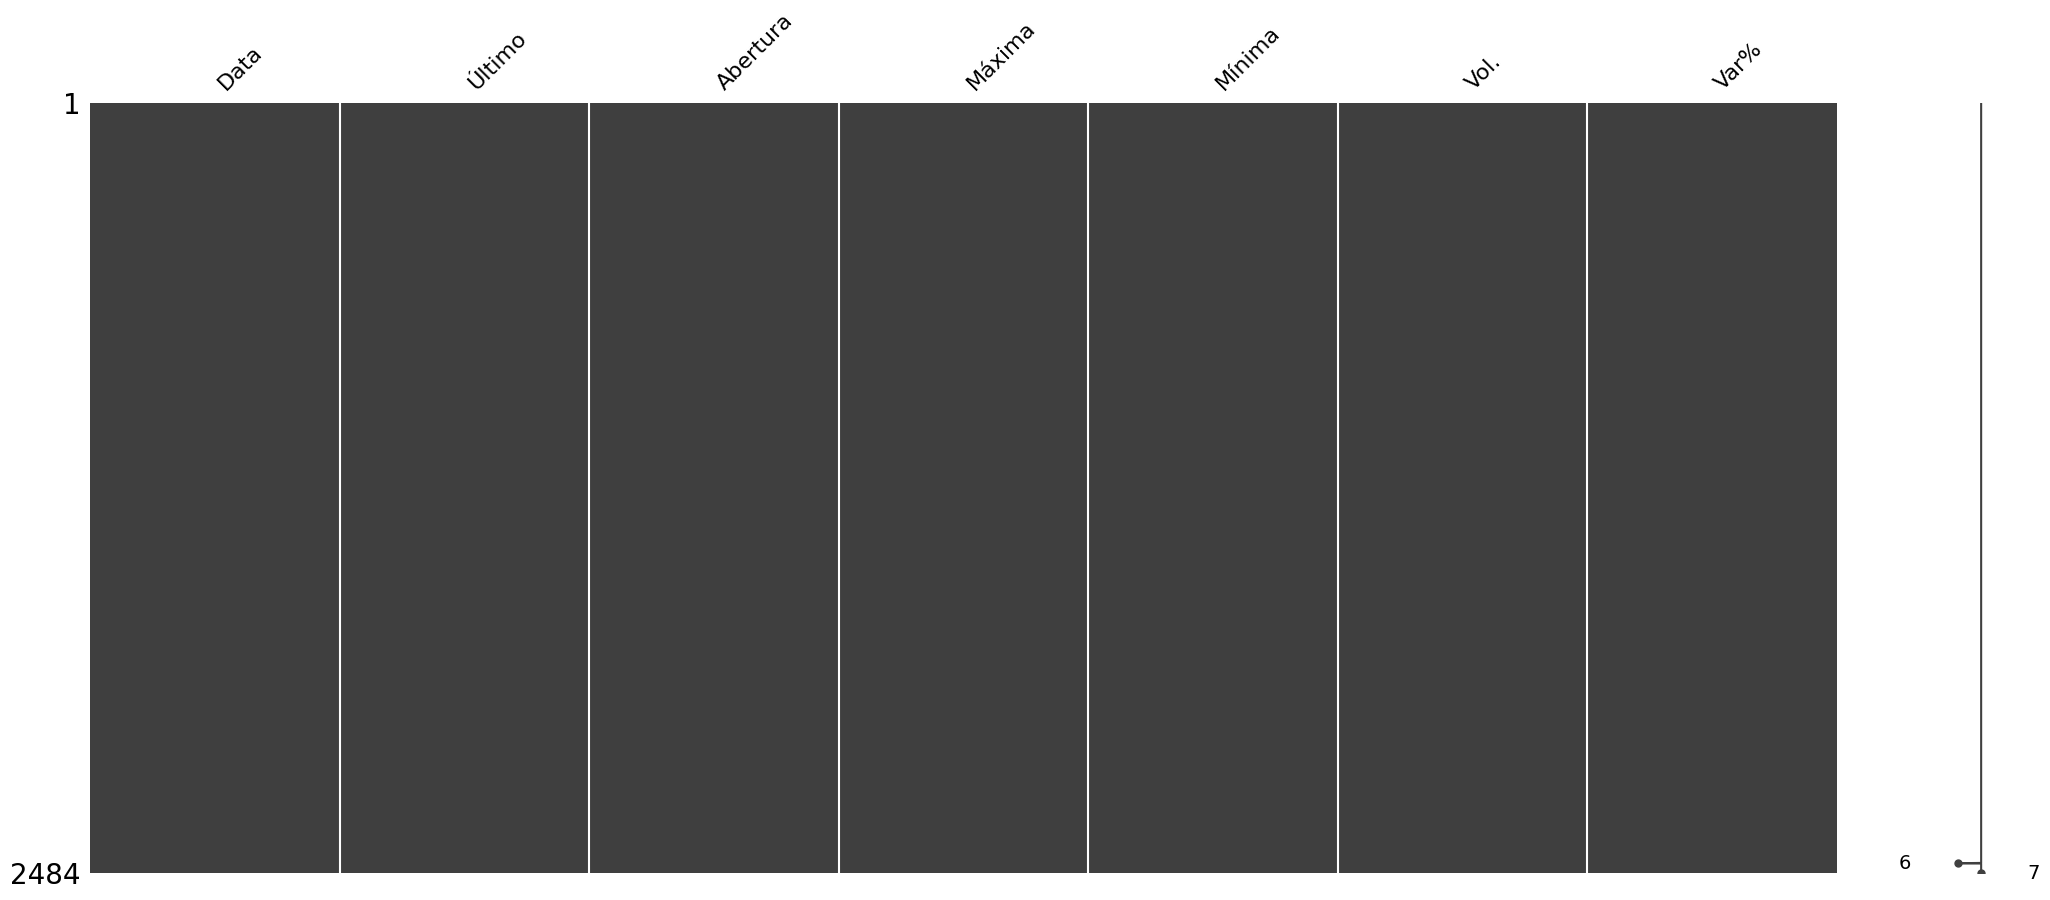

In [ ]:
#Identificar valores nulos em padrão de matriz
msno.matrix(df)

In [ ]:
#Identificacao de valores nulos
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,1
Var%,0


In [ ]:
#Padronização da coluna Vol. para mesmo valor numérico
def convert_volume(vol):
    if isinstance(vol, str):
        vol = vol.replace(',', '.').strip()
        if 'B' in vol:
            return float(vol.replace('B', '')) * 1e9
        elif 'M' in vol:
            return float(vol.replace('M', '')) * 1e6
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1e3
    return float(vol)

df['Volume'] = df['Vol.'].apply(convert_volume)

In [ ]:
# Edicao e criacao de novas colunas para analise exploratoria
def classify_variation(var):
    if pd.isna(var):
        return None
    var = str(var).replace(",", ".").replace("%", "")
    try:
        value = float(var)
        return "Alta" if value > 0 else "Baixa"
    except ValueError:
        return None

# Criacao coluna 'Var_num' com valor numerico sem caracter
df["Var_num"] = df["Var%"].astype(str).str.replace(",", ".").str.replace("%", "").astype(float)

# Criacao coluna 'Direcao' com Alta ou Baixa
df["Direcao"] = df["Var_num"].apply(lambda x: "Alta" if x > 0 else "Baixa")

# Criacao coluna 'Fechamento' com valor binario
df['Fechamento'] = df['Direcao'].apply(lambda x: 1 if x == 'Alta' else 0)


In [ ]:
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Volume,Var_num,Direcao,Fechamento
0,17.12.2025,157.327,158.578,158.611,156.351,"11,34B","-0,79%",1.134000e+10,-0.79,Baixa,0
1,16.12.2025,158.578,162.482,162.482,158.558,"9,92B","-2,40%",9.920000e+09,-2.40,Baixa,0
2,15.12.2025,162.482,160.766,163.073,160.766,"8,23B","1,07%",8.230000e+09,1.07,Alta,1
3,12.12.2025,160.766,159.189,161.263,159.189,"7,67B","0,99%",7.670000e+09,0.99,Alta,1
4,11.12.2025,159.189,159.072,159.850,158.098,"7,02B","0,07%",7.020000e+09,0.07,Alta,1
5,10.12.2025,159.075,157.984,159.691,157.628,"8,24B","0,69%",8.240000e+09,0.69,Alta,1
6,09.12.2025,157.981,158.187,158.851,155.188,"8,70B","-0,13%",8.700000e+09,-0.13,Baixa,0
7,08.12.2025,158.187,157.369,159.235,157.369,"9,02B","0,52%",9.020000e+09,0.52,Alta,1
8,05.12.2025,157.369,164.461,165.036,157.007,"14,53B","-4,31%",1.453000e+10,-4.31,Baixa,0
9,04.12.2025,164.456,161.760,164.551,161.759,"10,59B","1,67%",1.059000e+10,1.67,Alta,1


<Axes: >

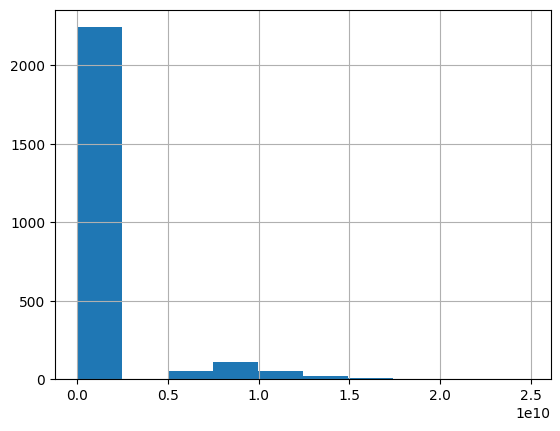

In [ ]:
#Valor historico de 'Volume' dos dados
df.Volume.hist()

/tmp/ipython-input-2381494623.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Data'] = pd.to_datetime(df['Data'],infer_datetime_format=True)


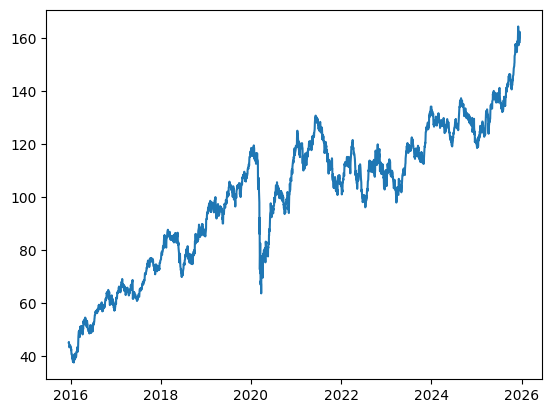

In [ ]:
#Padronizacao da coluna Data e explorando 'Data' por valor de
df['Data'] = pd.to_datetime(df['Data'],infer_datetime_format=True)

plt.plot(df['Data'], df['Abertura'])
plt.show()

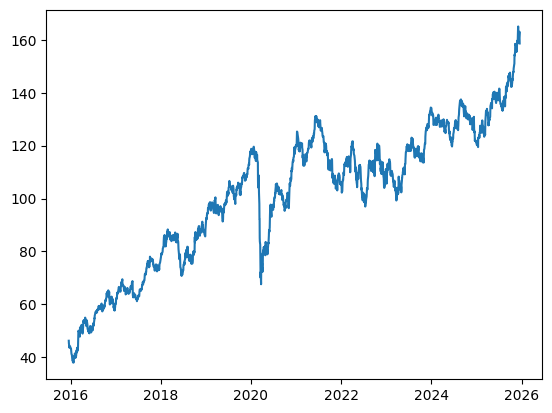

In [ ]:
#Explorando 'Data' por valor de 'Maxima'
plt.plot(df['Data'], df['Máxima'])
plt.show()

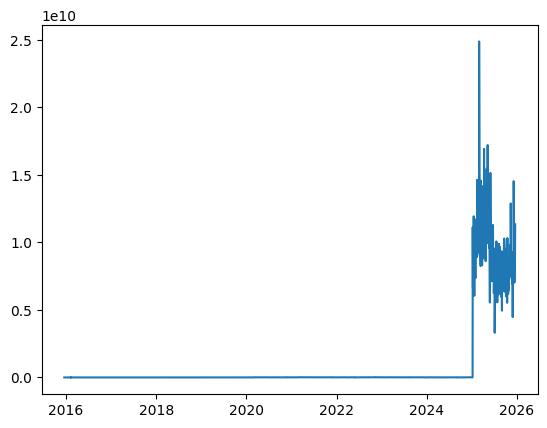

In [ ]:
#Exploracao de 'Volume' por data
plt.plot(df['Data'], df['Volume'])
plt.show()

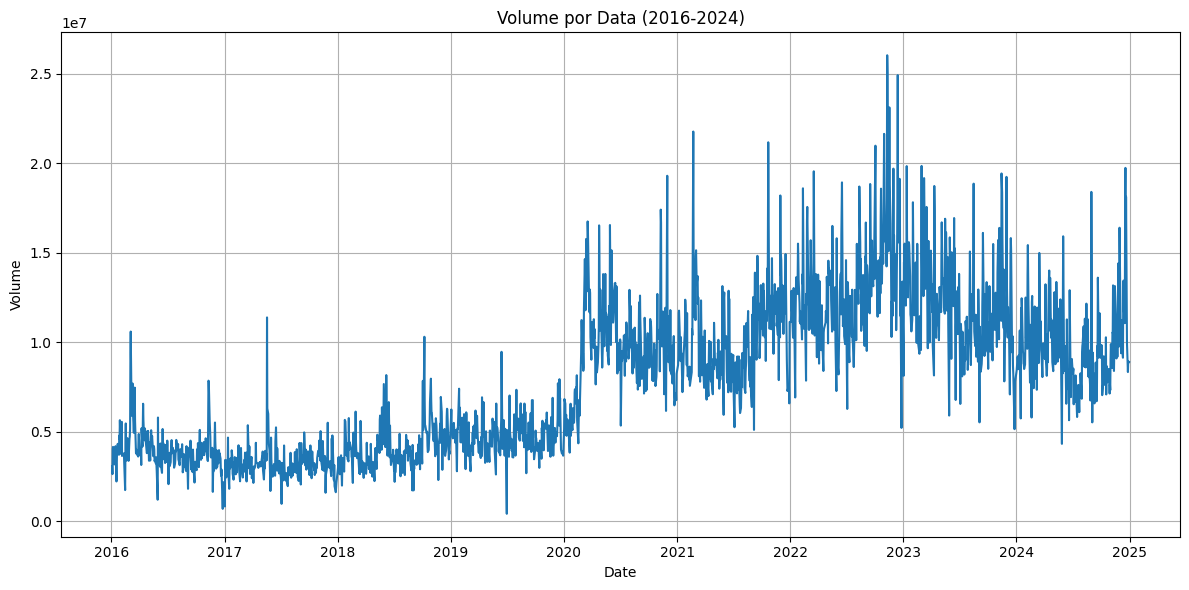

In [ ]:
#Exploracao entre o periodo de 2016-2024, por causa da analise anterior
df_2016_2024 = df[(df['Data'].dt.year >= 2016) & (df['Data'].dt.year <= 2024)]

plt.figure(figsize=(12, 6))
plt.plot(df_2016_2024['Data'], df_2016_2024['Volume'])
plt.title('Volume por Data (2016-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

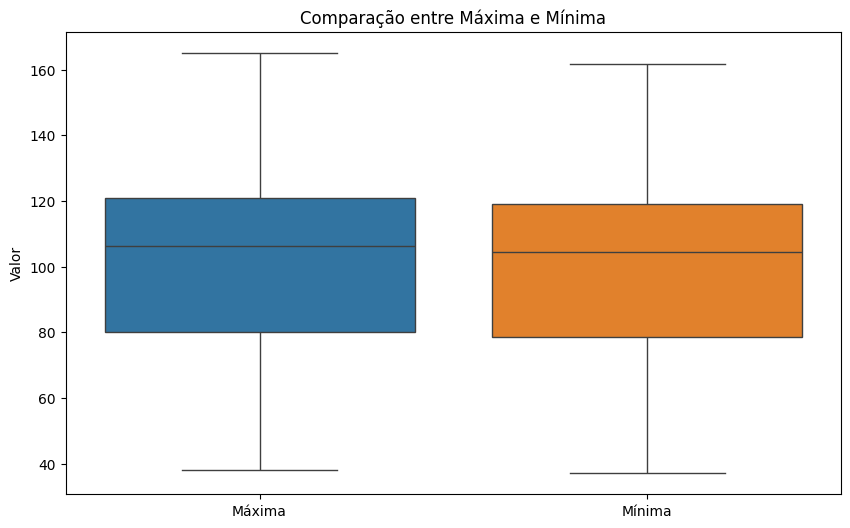

In [ ]:
#Boxplot de exploracao entre Maxima x Minima
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Máxima', 'Mínima']])
plt.title('Comparação entre Máxima e Mínima')
plt.ylabel('Valor')
plt.show()

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Volume,Var_num,Direcao,Fechamento
0,2025-12-17,157.327,158.578,158.611,156.351,"11,34B","-0,79%",1.134000e+10,-0.79,Baixa,0
1,2025-12-16,158.578,162.482,162.482,158.558,"9,92B","-2,40%",9.920000e+09,-2.40,Baixa,0
2,2025-12-15,162.482,160.766,163.073,160.766,"8,23B","1,07%",8.230000e+09,1.07,Alta,1
3,2025-12-12,160.766,159.189,161.263,159.189,"7,67B","0,99%",7.670000e+09,0.99,Alta,1
4,2025-12-11,159.189,159.072,159.850,158.098,"7,02B","0,07%",7.020000e+09,0.07,Alta,1


In [ ]:
#Criacao de df_ref para analise de Heatmap, removendo colunas
df_ref = df.drop(columns=[ "Vol.", "Var%", "Direcao"])
df_ref.head()

,Data,Último,Abertura,Máxima,Mínima,Volume,Var_num,Fechamento
0,2025-12-17,157.327,158.578,158.611,156.351,1.134000e+10,-0.79,0
1,2025-12-16,158.578,162.482,162.482,158.558,9.920000e+09,-2.40,0
2,2025-12-15,162.482,160.766,163.073,160.766,8.230000e+09,1.07,1
3,2025-12-12,160.766,159.189,161.263,159.189,7.670000e+09,0.99,1
4,2025-12-11,159.189,159.072,159.850,158.098,7.020000e+09,0.07,1


<Axes: >

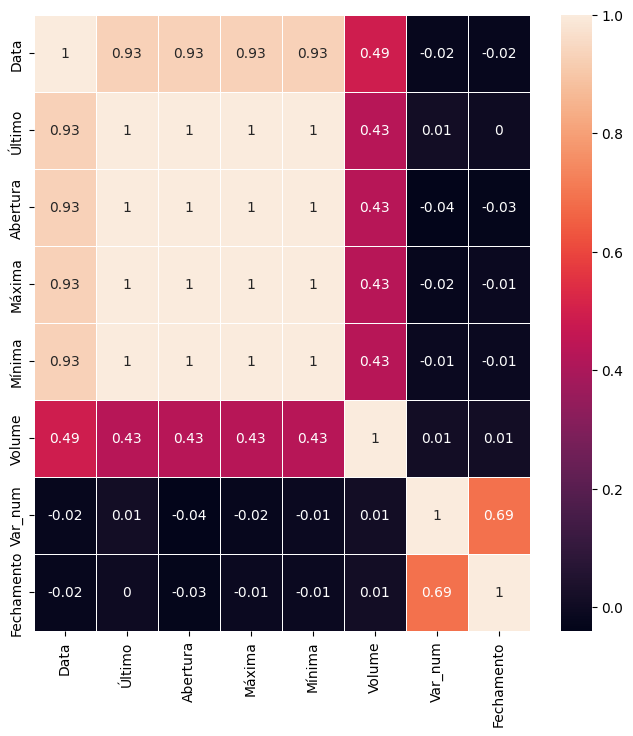

In [ ]:
#Heatmap de matrix de correlacao entre as variaveis para possiveis insights
correlation_matrix = df_ref.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Teste de Modelo Regressão Logistico

In [ ]:
#Criacao de um novo df para utilizacao no modelo
df_reg = df

In [ ]:
# Criacao de nova coluna binaria
df_reg['Direcao_bin'] = df_reg['Direcao'].map({'Baixa': 0, 'Alta': 1})

# Target: direção do próximo dia pois sera analisado do dia seguinte
df_reg['Target'] = df_reg['Direcao_bin'].shift(-1)

# Remover último registro (não possui próximo dia)
df_reg = df_reg.dropna().reset_index(drop=True)

In [ ]:
# Definicao de features e variaveis X e Y para testes e treinamento
features = [
    'Abertura',
    'Máxima',
    'Mínima',
    'Último',
    'Volume',
    'Var_num',
    'Fechamento'
]

X = df_reg[features]
y = df_reg['Target']

In [ ]:
#Divisao e padronizacaos dos dadoss para testes e treinamentos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    shuffle=False
)

In [ ]:
#Padronizacao de features e escalas normalizando
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Inicia o modelo de Regresso Logistica, usando as escalas treinadas com os dados
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000
)

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Valores e avaliacao do modelo e performace
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Acurácia:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.5249597423510467
ROC AUC: 0.5164655947477367

Matriz de Confusão:
 [[ 73 210]
 [ 85 253]]

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.46      0.26      0.33       283
         1.0       0.55      0.75      0.63       338

    accuracy                           0.52       621
   macro avg       0.50      0.50      0.48       621
weighted avg       0.51      0.52      0.49       621



In [ ]:
# Impacto de cada feature para definicao do modelo
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

coef_df

,Feature,Coeficiente
2,Mínima,1.038028
3,Último,0.141482
0,Abertura,0.084211
4,Volume,0.045522
6,Fechamento,-0.011828
5,Var_num,-0.089162
1,Máxima,-1.224790


In [ ]:
# Definicao de novo input para teste de previsao do modelo
new_input_data = pd.DataFrame({
    'Abertura': [162.482],
    'Máxima': [162.482],
    'Mínima': [158.558],
    'Último': [158.578],
    'Volume': [9.920000e+09],
    'Var_num': [2.40],
    'Fechamento': [1]
})

new_input_scaled = scaler.transform(new_input_data)
prediction = model.predict(new_input_scaled)
prediction_proba = model.predict_proba(new_input_scaled)[:, 1]
predicted_direction = 'Alta' if prediction[0] == 1 else 'Baixa'

print(f"Novo Input de Data:\n{new_input_data}")
print(f"\nEscalas do novo Input:\n{new_input_scaled}")
print(f"\nPrevisao de direcao para o proximo dia: {predicted_direction}")
print(f"Probabilidade de 'Baixa' (0): {1 - prediction_proba[0]:.4f}")
print(f"Probabilidade de 'Alta' (1): {prediction_proba[0]:.4f}")

Novo Input de Data:
   Abertura   Máxima   Mínima   Último        Volume  Var_num  Fechamento
0   162.482  162.482  158.558  158.578  9.920000e+09      2.4           1

Escalas do novo Input:
[[2.89520885 2.85756309 2.70249895 2.66461497 2.71436622 1.58211815
  0.95635195]]

Previsao de direcao para o proximo dia: Baixa
Probabilidade de 'Baixa' (0): 0.5029
Probabilidade de 'Alta' (1): 0.4971


### Teste de variacao de Tempos treinados

In [ ]:
#Definicao de novas variaveis de periodo de tempo para realizacao do modelo
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
def train_test_by_period(df, features, train_days, test_days=30):
    """
    train_days: número de dias para treino
    test_days: número de dias para teste (default = 30)
    """

    train_df = df_reg.iloc[-(train_days + test_days):-test_days]
    test_df = df_reg.iloc[-test_days:]

    X_train = train_df[features]
    y_train = train_df['Target']
    X_test = test_df[features]
    y_test = test_df['Target']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    return {
        'Treino_dias': train_days,
        'Acuracia': accuracy_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_proba)
    }


In [ ]:
#Definicao de periodos em dias
periods = {
    '1 mês': 21,
    '6 meses': 126,
    '1 ano': 252,
    '2 anos': 504,
    '3 anos': 756
}


In [ ]:
#Valores resultados de acuracia de cada periodo
results = []

for label, days in periods.items():
    result = train_test_by_period(
        df=df_reg,
        features=features,
        train_days=days,
        test_days=30  # próximo mês
    )
    result['Periodo'] = label
    results.append(result)

results_df = pd.DataFrame(results)
results_df

,Treino_dias,Acuracia,ROC_AUC,Periodo
0,21,0.600000,0.506787,1 mês
1,126,0.633333,0.624434,6 meses
2,252,0.533333,0.466063,1 ano
3,504,0.366667,0.416290,2 anos
4,756,0.366667,0.407240,3 anos


## Series Temporais (Teste ADF)

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Volume,Var_num,Direcao,Fechamento
0,2025-12-17,157.327,158.578,158.611,156.351,"11,34B","-0,79%",1.134000e+10,-0.79,Baixa,0
1,2025-12-16,158.578,162.482,162.482,158.558,"9,92B","-2,40%",9.920000e+09,-2.40,Baixa,0
2,2025-12-15,162.482,160.766,163.073,160.766,"8,23B","1,07%",8.230000e+09,1.07,Alta,1
3,2025-12-12,160.766,159.189,161.263,159.189,"7,67B","0,99%",7.670000e+09,0.99,Alta,1
4,2025-12-11,159.189,159.072,159.850,158.098,"7,02B","0,07%",7.020000e+09,0.07,Alta,1


In [ ]:
df.loc[df['Data'] == '20.12.2024']

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Volume,Var_num,Direcao,Fechamento
247,2024-12-20,122.102,121.183,122.209,120.7,"18,13M","0,75%",18130000.0,0.75,Alta,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        2484 non-null   datetime64[ns]
 1   Último      2484 non-null   float64       
 2   Abertura    2484 non-null   float64       
 3   Máxima      2484 non-null   float64       
 4   Mínima      2484 non-null   float64       
 5   Vol.        2483 non-null   object        
 6   Var%        2484 non-null   object        
 7   Volume      2483 non-null   float64       
 8   Var_num     2484 non-null   float64       
 9   Direcao     2484 non-null   object        
 10  Fechamento  2484 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 213.6+ KB


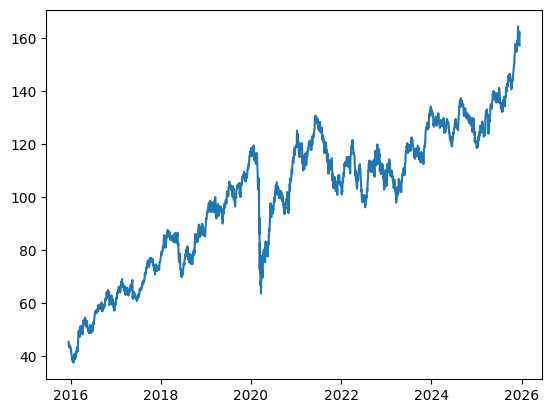

In [ ]:
plt.plot(df['Data'], df['Último'])

In [ ]:
#Tornando date em index
df_anima = df

df_anima.index = pd.to_datetime(df_anima['Data'])
df_anima.drop(columns=['Data'], inplace=True, axis=1)

In [ ]:
df_anima.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Volume,Var_num,Direcao,Fechamento,Direcao_bin,Target
Data,,,,,,,,,,,,
2025-12-17,157.327,158.578,158.611,156.351,"11,34B","-0,79%",1.134000e+10,-0.79,Baixa,0,0,0.0
2025-12-16,158.578,162.482,162.482,158.558,"9,92B","-2,40%",9.920000e+09,-2.40,Baixa,0,0,1.0
2025-12-15,162.482,160.766,163.073,160.766,"8,23B","1,07%",8.230000e+09,1.07,Alta,1,1,1.0
2025-12-12,160.766,159.189,161.263,159.189,"7,67B","0,99%",7.670000e+09,0.99,Alta,1,1,1.0
2025-12-11,159.189,159.072,159.850,158.098,"7,02B","0,07%",7.020000e+09,0.07,Alta,1,1,1.0


In [ ]:
df_anima = df_anima.drop(columns=[ "Vol.", "Var%", "Direcao","Direcao_bin", "Target"])
df_anima.head()

,Último,Abertura,Máxima,Mínima,Volume,Var_num,Fechamento
Data,,,,,,,
2025-12-17,157.327,158.578,158.611,156.351,1.134000e+10,-0.79,0
2025-12-16,158.578,162.482,162.482,158.558,9.920000e+09,-2.40,0
2025-12-15,162.482,160.766,163.073,160.766,8.230000e+09,1.07,1
2025-12-12,160.766,159.189,161.263,159.189,7.670000e+09,0.99,1
2025-12-11,159.189,159.072,159.850,158.098,7.020000e+09,0.07,1


In [ ]:
df_anima.fillna(0)

,Último,Abertura,Máxima,Mínima,Volume,Var_num,Fechamento
Data,,,,,,,
2025-12-17,157.327,158.578,158.611,156.351,1.134000e+10,-0.79,0
2025-12-16,158.578,162.482,162.482,158.558,9.920000e+09,-2.40,0
2025-12-15,162.482,160.766,163.073,160.766,8.230000e+09,1.07,1
2025-12-12,160.766,159.189,161.263,159.189,7.670000e+09,0.99,1
2025-12-11,159.189,159.072,159.850,158.098,7.020000e+09,0.07,1
...,...,...,...,...,...,...,...
2015-12-23,44.015,43.479,44.233,43.479,2.580000e+06,1.25,1
2015-12-22,43.470,43.208,43.632,43.137,2.660000e+06,0.63,1
2015-12-21,43.200,43.912,44.223,43.196,3.560000e+06,-1.62,0


In [ ]:
resultados = seasonal_decompose(df_anima['Último'], model='additive', period=30)

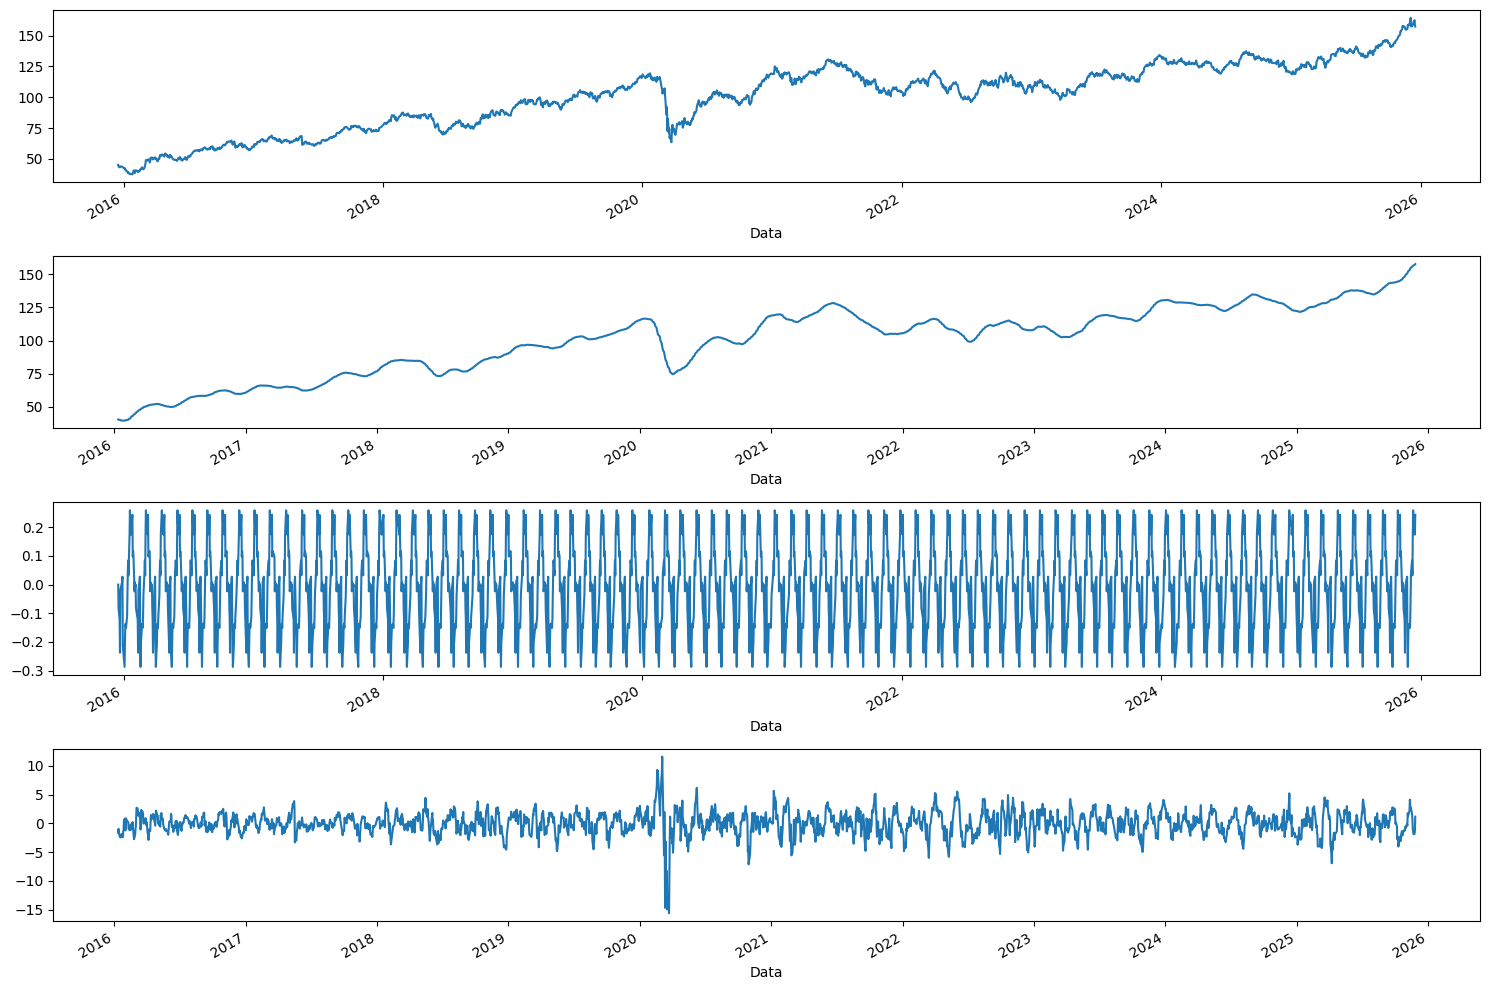

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [ ]:
sns.set_style('darkgrid')

In [ ]:
X = df_anima.Último.values

In [ ]:
#Realizao de teste ADF
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print(f"\t{key}: {value}")

ADF Statistic: -1.428019
p-value: 0.568772
Critical Values:
	1%: -3.4329948869452735
	5%: -2.8627084918155745
	10%: -2.5673920343230283


In [ ]:
#Resultado não estacionaria, porque o valor de estatisticos de ADF é maior que os valores Criticos